# Д.А., Machine Learning.
## Задача: обучение модели для определения спама.

### Условия.
Имеется имеется два датасета: тренировочный и тестовый. В тренировочном имеется два столбца: text_type - столбец, определяющая тип сообщения, text - текст сообщения. В тестовом есть только столбец из текстов сообщения.

### План.
1. Получим данные из файла тренировочного датасета и обработаем, убрав элементы, не имеющие флага, если они есть.
2. Векторизировать данные.
3. Обучить модель.
4. Обработать данные из тестового датасета и сохранить результаты обработки в файл разрешения .csv

1. Загрузим все необходимые модули и получим данные из файла, после чего посмотрим на размеры датасета (количество строк и столбцов)

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("train_spam.csv")
# Основные статистики
print(train_data.shape)

(16278, 2)


Выведем несколько элементов таблиы.

In [85]:
labeled_data.head()

,score,text
0,ham,j jim whitehead ejw cse ucsc edu writes j you ...
1,ham,original message from bitbitch magnesium net p...
2,ham,java for managers vince durasoft who just taug...
3,ham,there is a youtuber name saiman says
4,ham,underpriced issue with high return on equity t...


Определим уникальные значения флагов в датасете для дальнейшего удаления неопределенных сообщений

In [86]:
unique_lables = train_data['text_type'].unique()
print(unique_lables)


['ham' 'spam']


In [87]:
train_data = train_data.dropna(subset=['text_type'])
train_data = train_data[train_data['text_type'].isin(unique_lables)]
train_data['text_type'].unique()
train_data.shape

(16278, 2)

В данном случае ничего не изменилось - данные подобраны без пропущенных флагов.

Посмотрим на распределение спама и не спама в датасете.

Распределение классов:
text_type
ham     11469
spam     4809
Name: count, dtype: int64


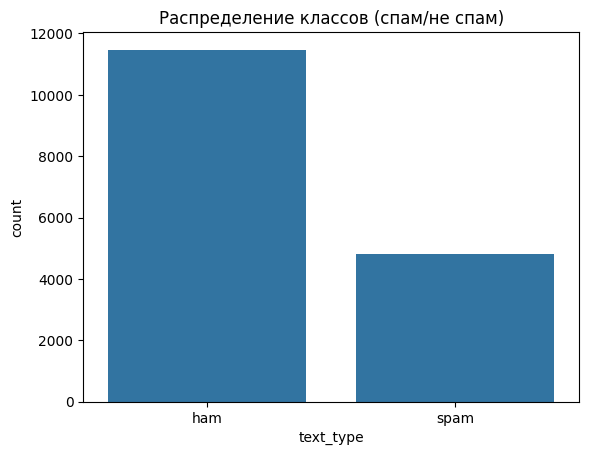

In [88]:
class_counts = train_data['text_type'].value_counts()
print("Распределение классов:")
print(class_counts)

# Визуализация распределения классов
sns.countplot(x='text_type', data=train_data)
plt.title("Распределение классов (спам/не спам)")
plt.show()

2. Начинаем векторизацию.
Перед началом векторизации, то есть приведения текста в числовые векторы, для начала обработаем текст, приведя все буквы к одному виду. Текст будет представлять собой набор строчных латинских (английских) букв, среди них не будет общих слов, таких как or, but, etc.
В данном случае для векторизации будет использован метод TF-IDF, учитывающий частоту слова и его значимость по отношению к другим словам текста.

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = tfidf_vectorizer.fit_transform(train_data['text'])
y = train_data['text_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Обучение модели
model = MultinomialNB()
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)

Итоги классификации и полученная точность:

In [91]:
print(classification_report(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.98      0.93      2321
        spam       0.94      0.65      0.77       935

    accuracy                           0.89      3256
   macro avg       0.90      0.82      0.85      3256
weighted avg       0.89      0.89      0.88      3256

Точность: 0.8866707616707616


In [92]:
# Загрузка тестового датасета
test_data = pd.read_csv("test_spam.csv")

# Применение TF-IDF и модели для предсказания
test_vectorized = tfidf_vectorizer.transform(test_data['text'])
test_predictions = model.predict(test_vectorized)

# Добавление предсказаний в новый датасет и сохранение в CSV
test_data['score'] = test_predictions
result_df = test_data[['score', 'text']]

# Сохранение в CSV-файл
result_df.to_csv("scored_results.csv", index=False)

Распределение классов:
score
ham     3255
spam     815
Name: count, dtype: int64


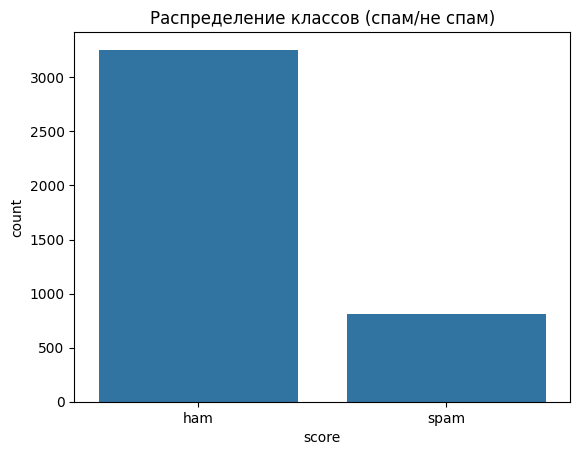

In [93]:
labeled_data = pd.read_csv("scored_results.csv")
class_counts = labeled_data['score'].value_counts()
print("Распределение классов:")
print(class_counts)

sns.countplot(x='score', data=labeled_data)
plt.title("Распределение классов (спам/не спам)")
plt.show()

### Второй способ

In [94]:
train_data = pd.read_csv("train_spam.csv")

# Очистка текста и векторизация с использованием TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', 
    lowercase=True, 
    ngram_range=(1, 2),  # Использование униграмм и биграмм
    min_df=2,  # Минимальная частота документов
    max_df=0.9  # Максимальная частота документов
)
X = tfidf_vectorizer.fit_transform(train_data['text'])
y = train_data['text_type']

In [95]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Обучение модели
model = MultinomialNB()
model.fit(X_train, y_train)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred))
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

Точность: 0.902948402948403
Отчет о классификации:
              precision    recall  f1-score   support

         ham       0.89      0.98      0.93      2294
        spam       0.94      0.72      0.81       962

    accuracy                           0.90      3256
   macro avg       0.92      0.85      0.87      3256
weighted avg       0.91      0.90      0.90      3256



In [96]:

# Загрузка тестового датасета
test_data = pd.read_csv("test_spam.csv")

# Векторизация тестовых данных с использованием той же TF-IDF модели
test_vectorized = tfidf_vectorizer.transform(test_data['text'])

# Предсказание с использованием обученной модели
test_predictions = model.predict(test_vectorized)

# Добавление предсказаний в датасет и сохранение в CSV
test_data['score'] = test_predictions
result_df = test_data[['score', 'text']]
result_df.to_csv("scored_results_2.csv", index=False)

Распределение классов:
score
ham     3195
spam     875
Name: count, dtype: int64


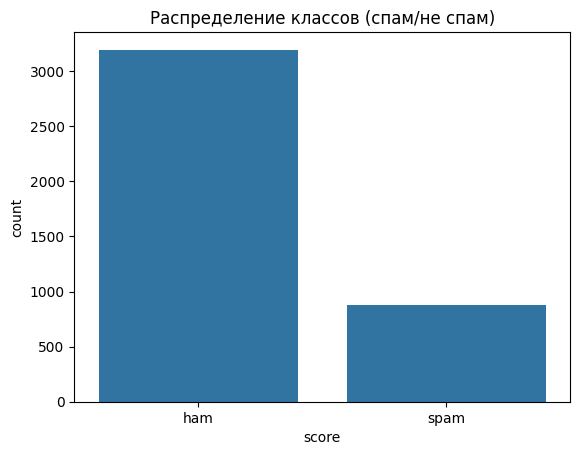

In [97]:
labeled_data = pd.read_csv("scored_results_2.csv")
class_counts = labeled_data['score'].value_counts()
print("Распределение классов:")
print(class_counts)

sns.countplot(x='score', data=labeled_data)
plt.title("Распределение классов (спам/не спам)")
plt.show()